# Fertilize Type Prediction Analysis

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [40]:
df=pd.read_csv('Fertilizer Prediction.csv')

In [41]:
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [42]:
df.shape

(99, 9)

In [43]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [44]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [46]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include='object')

<AxesSubplot:>

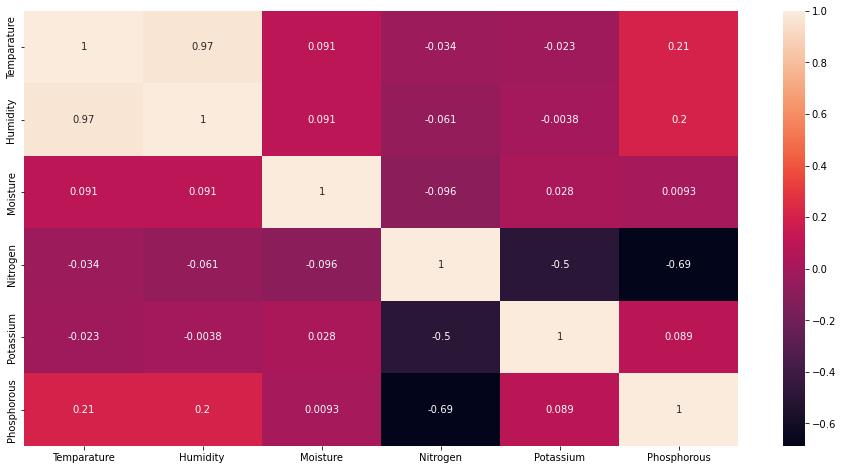

In [112]:
plt.figure(figsize=(16,8))
sns.heatmap(df_num.corr(),annot=True)

In [48]:
## We can clearly see that Temperature and humidity and highly correlated 

In [50]:
df.columns=df.columns.str.replace(' ','_')

In [66]:
df_num.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


# Performing EDA To Visualize data 

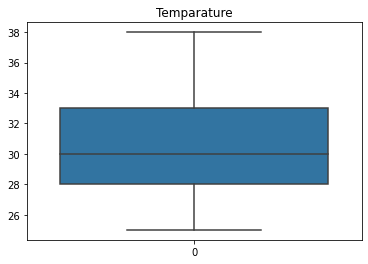

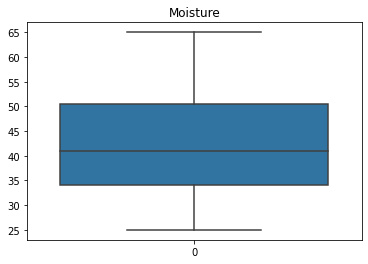

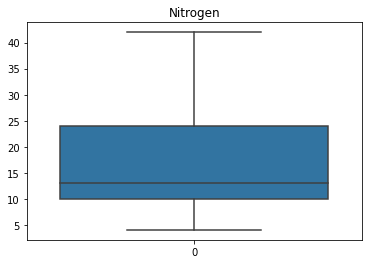

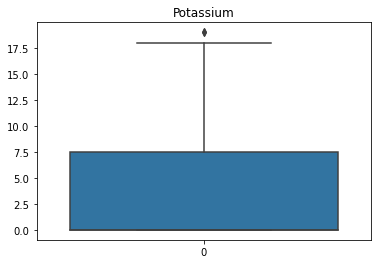

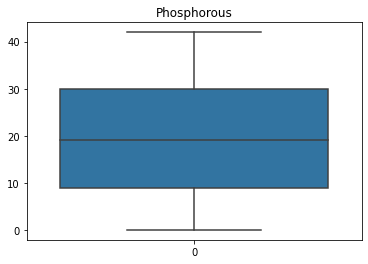

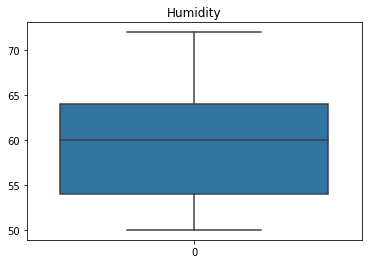

In [82]:
for col in df.select_dtypes('number').columns:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='Soil_Type', ylabel='count'>

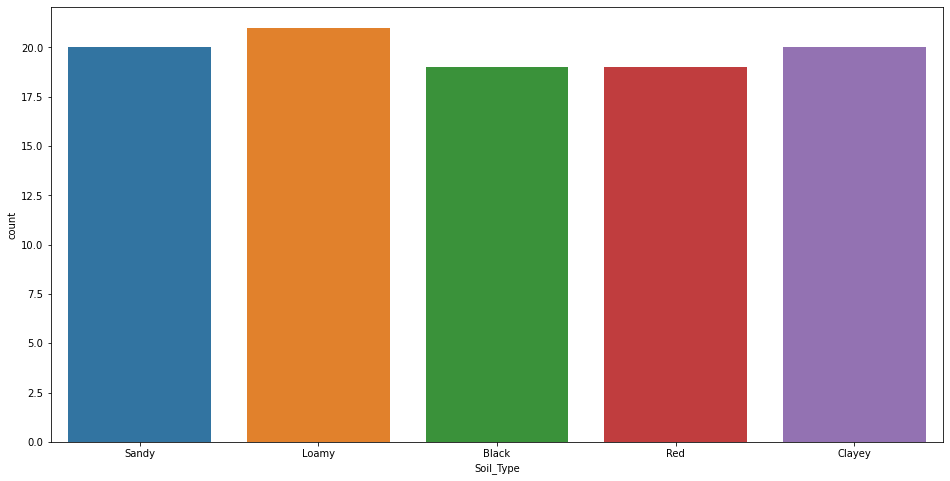

In [109]:
#Visualising the soil type 
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', data = df)

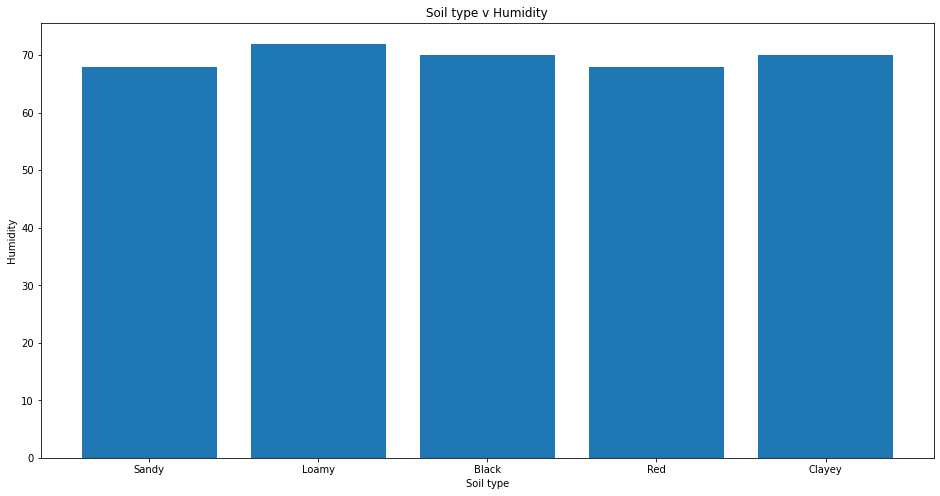

In [177]:
#Visualising Soil type v Humdity to check out the best values 


soil= df['Soil_Type']
counts = df.Humidity
plt.figure(figsize=(16,8))

plt.bar(soil, counts)
plt.title('Soil type v Humidity')
plt.xlabel('Soil type')
plt.ylabel('Humidity')
plt.show()

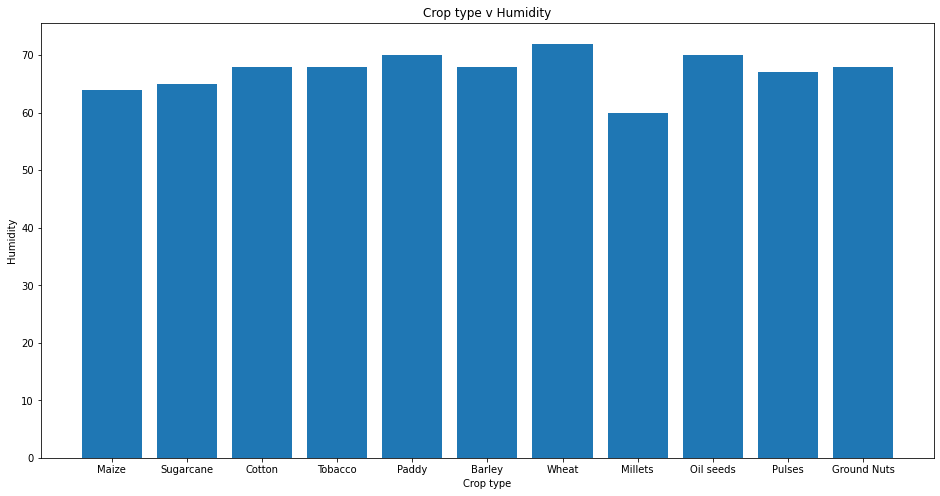

In [105]:
soil= df['Crop_Type']
counts = df.Humidity
plt.figure(figsize=(16,8))

plt.bar(soil, counts)
plt.title('Crop type v Humidity')
plt.xlabel('Crop type')
plt.ylabel('Humidity')
plt.show()

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

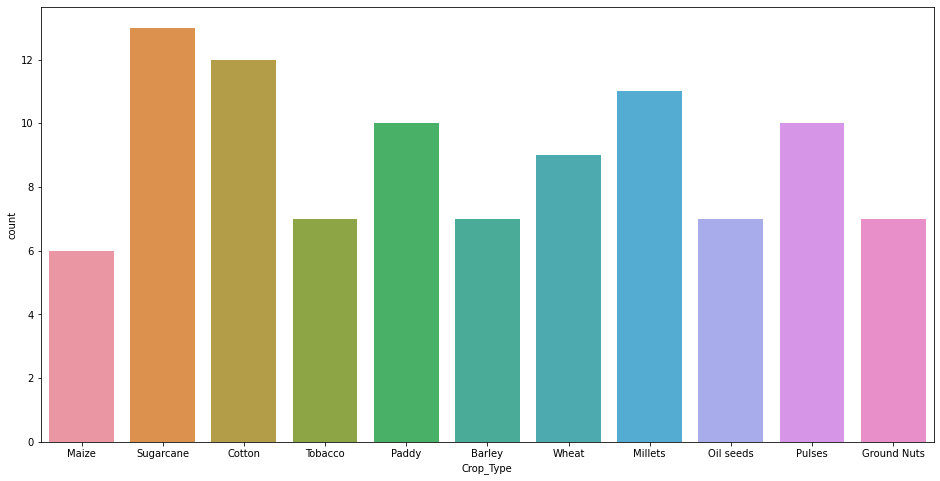

In [110]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop_Type', data = df)

<AxesSubplot:xlabel='Fertilizer_Name', ylabel='count'>

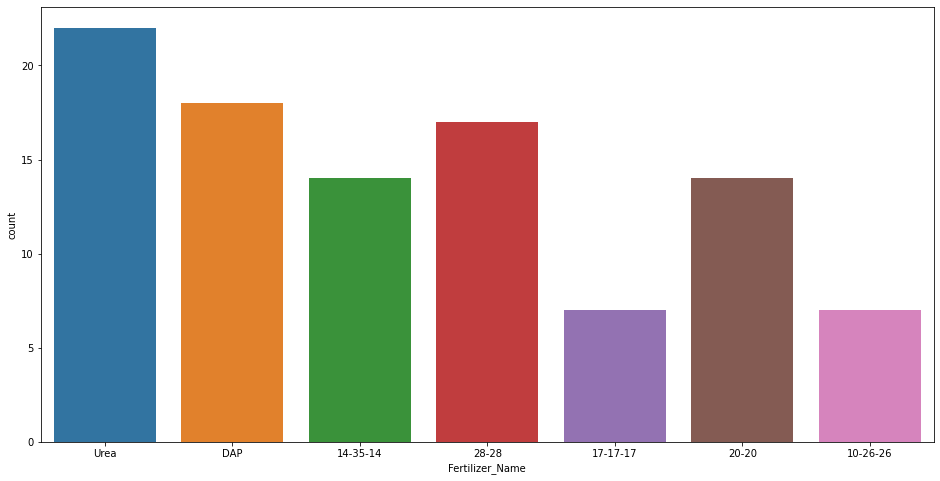

In [115]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer_Name', data = df)

<AxesSubplot:xlabel='Soil_Type', ylabel='Temparature'>

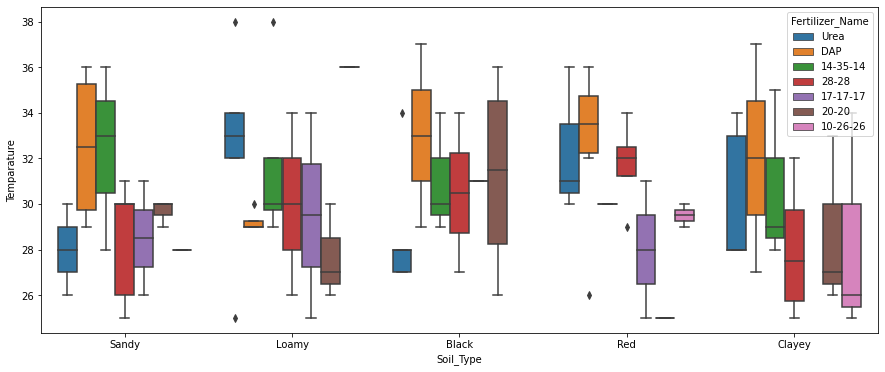

In [117]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil_Type'],y=df['Temparature'],hue=df['Fertilizer_Name'])

In [133]:
## Encoding the categorical Variables 
df_cat=df.select_dtypes(include='object')

In [138]:
df_cat_main=df_cat[['Soil_Type', 'Crop_Type']]

In [145]:
df_category=pd.get_dummies(df_cat_main,drop_first=True)

In [143]:
df_num=df.select_dtypes(include=np.number)

In [150]:
X=pd.concat([df_num,df_category],axis=1)

In [151]:
y=df['Fertilizer_Name']

# Model Building

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

# Standard Scaling the Numerical Featrures 

In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Random Forest Classifier 

In [162]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 420)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=420)

In [163]:
y_pred = classifier.predict(X_test)

In [161]:
y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', '17-17-17', 'DAP', '14-35-14', '14-35-14', 'Urea',
       '17-17-17', 'DAP'], dtype=object)

# Plotting the Confusion Matrix to check metrics of the model 

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]


0.9666666666666667

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(classifier,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(X_train,y_train)

pred_rand = grid_rand.predict(X_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.67      1.00      0.80         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.95      0.95      0.94        30
weighted avg       0.98      0.97      0.97        30

Best score :  0.9130434782608695
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [169]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, min_samples_split= 2, n_estimators= 300)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300)

In [170]:
y_pred = classifier.predict(X_test)

In [171]:
y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '14-35-14', 'Urea', '14-35-14', '28-28',
       '10-26-26', '17-17-17', 'DAP', '14-35-14', '14-35-14', 'Urea',
       '17-17-17', 'DAP'], dtype=object)

In [175]:
print('The final accuracy achieved after Grid Search CV is 91.3%')

The final accuracy achieved after Grid Search CV is 91.3%
